In [20]:
import pyspark
from pyspark.sql import SparkSession
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

spark = SparkSession.builder.getOrCreate()

df = spark.read.format("csv").option("header", "true").load("beer_reviews.csv") #beer_reviews
df.createOrReplaceTempView("beer_reviews")

df = spark \
        .read.format('csv')\
        .option('header', 'true')\
        .load('beer_reviews.csv')

#Adding column review_average to sumarize all review parameters
df_beer = spark.sql('select *, (review_overall + review_aroma + review_appearance + review_palate + review_taste) / 5 as review_average from beer_reviews')

## 1. Estilos de cerveja melhor avaliados

+--------------------------------+------------------+
|beer_style                      |review_average    |
+--------------------------------+------------------+
|Quadrupel (Quad)                |4.131604556010168 |
|American Double / Imperial Stout|4.128003155507347 |
|Russian Imperial Stout          |4.109244582386509 |
|Eisbock                         |4.084716485167106 |
|American Wild Ale               |4.083207822861634 |
|Gueuze                          |4.082509568979865 |
|American Double / Imperial IPA  |4.057824767088862 |
|Lambic - Unblended              |4.03375224416517  |
|Weizenbock                      |4.0259987250318785|
|Flanders Red Ale                |4.020018007202887 |
|American Barleywine             |3.9983575276863164|
|Belgian IPA                     |3.9932162617272113|
|Baltic Porter                   |3.9834600760456373|
|American Strong Ale             |3.973842541868832 |
|Belgian Strong Dark Ale         |3.9721219828842345|
|American Black Ale         

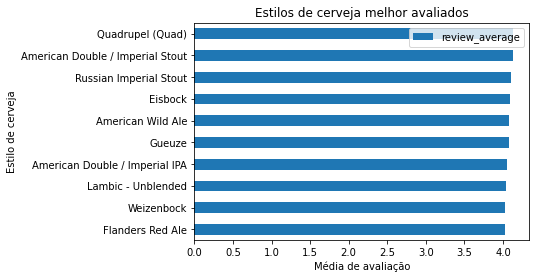

In [53]:
import pyspark.sql.functions as f

best_style = df_beer\
    .groupBy('beer_style')\
    .agg(f.mean('review_average').alias('review_average'))\
    .sort('review_average', ascending=False)

best_style.show(20, truncate=False)

pd = best_style.toPandas().head(10)

ax = pd.plot.barh(x='beer_style', y='review_average')
ax.invert_yaxis()
ax.set_ylabel('Estilo de cerveja')
ax.set_xlabel('Média de avaliação')
ax.set_title('Estilos de cerveja melhor avaliados')
plt.show()

## 2. Cervejas melhor avaliadas

+--------------------------------------------------------------------+--------------+
|beer_name                                                           |review_average|
+--------------------------------------------------------------------+--------------+
|Empire Doppelbock                                                   |5.0           |
|Fritzkrieg Hop IPA                                                  |5.0           |
|Old Incinerator Brandy Barrel Barleywine                            |5.0           |
|Rogue Black Brutal                                                  |5.0           |
|Engelbert Moonbeam                                                  |5.0           |
|Drake's Pinot Noir Barrel Aged Imperial Stout                       |5.0           |
|Chicago Terminal Oatmeal Bourbon Stout                              |5.0           |
|Edsten Triple-Wit                                                   |5.0           |
|Date Night With Jumbo Love                           

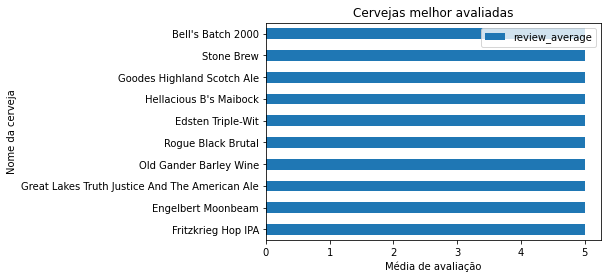

In [54]:
best_beers = df_beer.groupby('beer_name')\
       .agg(f.mean('review_average').alias('review_average'))\
       .sort('review_average', ascending=False)

best_beers.show(20, truncate=False)

pd = best_beers.toPandas().head(10)

ax = pd.plot.barh(x='beer_name', y='review_average')
ax.invert_yaxis()
ax.set_ylabel('Nome da cerveja')
ax.set_xlabel('Média de avaliação')
ax.set_title('Cervejas melhor avaliadas')
plt.show()

## 3. Cervejarias melhor avaliadas

In [ ]:
best_brewery = df_beer.groupby('brewery_name')\
       .agg(f.mean('review_average').alias('review_average'))\
       .sort('review_average', ascending=False)

best_brewery.show(20, truncate=False)

pd = best_brewery.toPandas().head(10)

ax = pd.plot.barh(x='brewery_name', y='review_average')
ax.invert_yaxis()
ax.set_ylabel('Nome da cevejaria')
ax.set_xlabel('Média de avaliação')
ax.set_title('Cevejarias melhor avaliadas')
plt.show()

+----------------------------------------------------------+-----------------+
|brewery_name                                              |review_average   |
+----------------------------------------------------------+-----------------+
|Rascal Creek Brewing Co.                                  |5.0              |
|Thai Me Up                                                |4.9              |
|Edsten Brewing Company                                    |4.9              |
|Brauerei Gundel                                           |4.8              |
|Weissbräu Kösslarn                                        |4.8              |
|Binghams Brewery                                          |4.8              |
|Ludwig Roth Bierbrauerei GmbH                             |4.7              |
|Elizabeth Street Brewery                                  |4.7              |
|Pivovar Kout Na Šumavě                                   |4.6              |
|H.Nettelbeck KG                                    